In [1]:
%load_ext autoreload
%autoreload 2
from pkg.forecast import SalesForecast
import pandas as pd
import os
import csv
import pmdarima as pm

Importing plotly failed. Interactive plots will not work.


In [2]:
sale = 'data/sales/1403Q2/monthly_sales.csv'
forecasts = 'data/results/1403Q2/1403Q2_total_forecast.csv'
headers=['product', 'date', 'forecast', 'model']
if not os.path.exists(forecasts):
    with open(forecasts, "w", newline='') as file:
        writer = csv.writer(file)
        writer.writerow(headers)
sale_df_total = pd.read_csv(sale)
forecast_df = pd.read_csv(forecasts)

products_fr = pd.unique(forecast_df['product'])
products = pd.unique(sale_df_total['product'])
sale_df_total.date += 62100

In [3]:
sale_df = sale_df_total[sale_df_total['product'] == "Venotica 90"]
prod_fr = SalesForecast("Venotica 90", sale_df, forecasts)
prod_fr.preprocess_data()

In [16]:
prod_fr.sale_df['sales'][-12:].mean()

2113.5

In [25]:
model = pm.auto_arima(df, seasonal=True, m=12,
                    max_order=None, max_p=6, max_q=6, max_d=2,
                    max_P=4, max_Q=4, max_D=1,
                    stepwise=True, suppress_warnings=True, error_action="ignore",
                    seasonal_test='ch')
prediction = model.predict(n_periods=1)

In [45]:
prod_fr.model_selection()

In [54]:
prod_fr.best_model_type = "ETS"
prod_fr.predict()
prod_fr.redistribute_smoothing()
prod_fr.save_csv()

Venotica 90 forecasting is done!


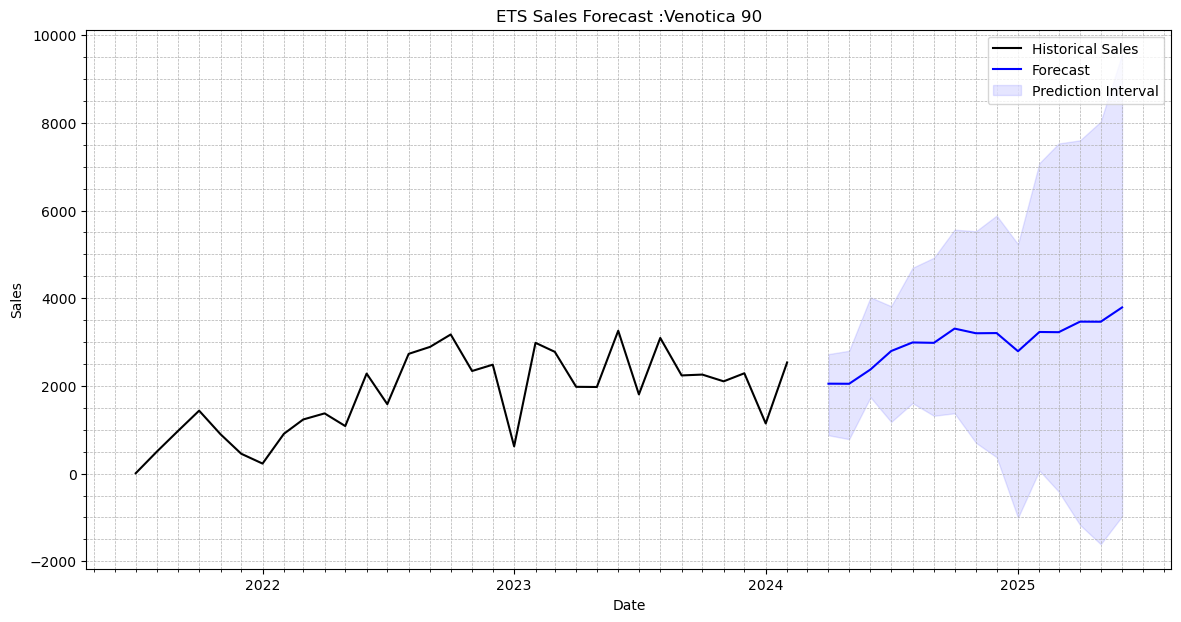

In [53]:
prod_fr.plot()

In [9]:
prod_fr.save_csv()

Fularent forecasting is done!


In [10]:
pivot = forecast.pivot_table(index=['product', 'dep'], columns='date', values='forecast').reset_index()

NameError: name 'forecast' is not defined

In [11]:
prod_fr.forecast_df

,product,date,forecast,model,dep
0,Fularent,140301,1548.0,ETS,انکولوژی شیمیایی
1,Fularent,140302,1572.0,ETS,انکولوژی شیمیایی
2,Fularent,140303,1596.0,ETS,انکولوژی شیمیایی
3,Fularent,140304,1786.0,ETS,انکولوژی شیمیایی
4,Fularent,140305,1809.0,ETS,انکولوژی شیمیایی
5,Fularent,140306,1833.0,ETS,انکولوژی شیمیایی
6,Fularent,140307,2023.0,ETS,انکولوژی شیمیایی
7,Fularent,140308,2047.0,ETS,انکولوژی شیمیایی
8,Fularent,140309,2070.0,ETS,انکولوژی شیمیایی
9,Fularent,140310,2260.0,ETS,انکولوژی شیمیایی


In [12]:
from pkg.google_sheet import GoogleSheet

In [17]:
forecasts = 'data/results/Forecasts test.csv'
forecast_total_df = pd.read_csv(forecasts)

In [3]:
pivot =forecast_total_df.pivot_table(index=['product', 'dep'], columns='date', values='forecast').reset_index()

In [ ]:
sheet = GoogleSheet(pivot)

In [ ]:
sheet.save_gsheet()

In [4]:
pivot

date,product,dep,140301,140302,140303,140304,140305,140306,140307,140308,140309,140310,140311,140312,140401,140402,140403
0,Ablyze,انکولوژی بیولوژیک,159.755974,166.205156,176.207854,223.067368,216.816531,218.116063,221.944206,234.095944,229.793434,253.764854,259.015872,261.062009,228.090199,235.039381,245.042079
1,Alvopax 30,انکولوژی شیمیایی,849.332969,905.707793,877.113792,901.240954,907.402057,907.782260,1134.152912,1257.532588,1252.262611,1311.016194,1372.854215,1313.729715,1174.055998,1189.563751,1182.561054
2,Cinnal-f 300,ناباروری,7012.000000,7507.000000,7896.000000,9558.000000,10079.000000,9756.000000,8568.000000,8849.000000,9189.000000,9615.000000,9367.000000,9279.000000,7576.000000,8071.000000,8460.000000
3,Fularent,انکولوژی شیمیایی,1548.000000,1572.000000,1596.000000,1786.000000,1809.000000,1833.000000,2023.000000,2047.000000,2070.000000,2260.000000,2284.000000,2308.000000,2498.000000,2521.000000,2545.000000
4,Pectuna,انکولوژی بیولوژیک,3182.414975,3245.740269,3274.901790,3598.393546,3644.879222,3697.270351,3977.837804,4025.242672,4096.626349,4431.608810,4521.697683,4544.731424,4766.063509,4829.388802,4858.550324


In [9]:
dep_dict = {
    "انکولوژی بیولوژیک": 'Bio Onco',
    'انکولوژی شیمیایی': 'Chem Onco',
    'رسپیراتوری': 'Resp',
    'کانتراست مدیا': 'Contrast',
    'زیبایی': 'Beaut',
    'نورولوژی بیولوژیک': 'Bio Neuro',
    'انکولوژی اطفال': 'Ped Onco',
    'نفرولوژی': 'Nephro',
    'نورولوژی شیمیایی': 'Chem Neuro',
    'کاردیو متابولیک': 'Cardio-Metab',
    'غدد': 'Endo',
    'مکمل': 'Suppl',
    'خود ایمنی و پوکی استخوان': 'Autoimm & Osteo',
    'ناباروری': 'Infert',
    'بیماری های عفونی و واکسن': 'ID & Vacc',
    'چشم': 'Ophth',
    'درمو کازمتیک': 'Dermo',
}

In [10]:
pivot['file_name'] = pivot.dep.map(dep_dict)

In [11]:
pivot

date,product,dep,140301,140302,140303,140304,140305,140306,140307,140308,140309,140310,140311,140312,140401,140402,140403,file_name
0,Ablyze,انکولوژی بیولوژیک,159.755974,166.205156,176.207854,223.067368,216.816531,218.116063,221.944206,234.095944,229.793434,253.764854,259.015872,261.062009,228.090199,235.039381,245.042079,Bio Onco
1,Alvopax 30,انکولوژی شیمیایی,849.332969,905.707793,877.113792,901.240954,907.402057,907.782260,1134.152912,1257.532588,1252.262611,1311.016194,1372.854215,1313.729715,1174.055998,1189.563751,1182.561054,Chem Onco
2,Cinnal-f 300,ناباروری,7012.000000,7507.000000,7896.000000,9558.000000,10079.000000,9756.000000,8568.000000,8849.000000,9189.000000,9615.000000,9367.000000,9279.000000,7576.000000,8071.000000,8460.000000,Infert
3,Fularent,انکولوژی شیمیایی,1548.000000,1572.000000,1596.000000,1786.000000,1809.000000,1833.000000,2023.000000,2047.000000,2070.000000,2260.000000,2284.000000,2308.000000,2498.000000,2521.000000,2545.000000,Chem Onco
4,Pectuna,انکولوژی بیولوژیک,3182.414975,3245.740269,3274.901790,3598.393546,3644.879222,3697.270351,3977.837804,4025.242672,4096.626349,4431.608810,4521.697683,4544.731424,4766.063509,4829.388802,4858.550324,Bio Onco


In [8]:
pivot.columns[:-1]

Index(['product',     'dep',    140301,    140302,    140303,    140304,
          140305,    140306,    140307,    140308,    140309,    140310,
          140311,    140312,    140401,    140402,    140403],
      dtype='object', name='date')

In [36]:
from openpyxl import Workbook , load_workbook
from openpyxl.worksheet.table import Table, TableStyleInfo

In [53]:
class ExcelManager:
    def __init__(self, directory):
        self.directory = directory

    def setup_excel_writer(self, file_name, df_columns):
        if not os.path.exists(file_name):
            # Create a new workbook and setup headers
            workbook = Workbook()
            sheet = workbook.active
            sheet.title = "Sheet1"
            # Write headers
            for i, col in enumerate(df_columns, start=1):
                sheet.cell(row=1, column=i, value=str(col))
            workbook.save(file_name)
            workbook.close()
        
        # Return the ExcelWriter object
        writer = pd.ExcelWriter(file_name, engine='openpyxl', mode='a', if_sheet_exists='overlay')
        return writer

    def apply_table_formatting_and_adjust_columns(self, file_name):
        book = load_workbook(file_name)
        sheet = book['Sheet1']
        
        # Determine the range for the table
        end_row = sheet.max_row
        end_column = sheet.max_column
        table_range = f"A1:{chr(64 + end_column)}{end_row}"
        
        # Create a table
        table = Table(displayName="Table1", ref=table_range)
        # Add a default style with striped rows
        style = TableStyleInfo(name="TableStyleMedium9", showFirstColumn=False,
                               showLastColumn=False, showRowStripes=True, showColumnStripes=True)
        table.tableStyleInfo = style
        # Add the table to the sheet
        sheet.add_table(table)
        
        # Adjust column widths
        for col in sheet.columns:
            max_length = 0
            column = col[0].column_letter  # Get the column name
            for cell in col:
                try:
                    if len(str(cell.value)) > max_length:
                        max_length = len(cell.value)
                except:
                    pass
            adjusted_width = (max_length + 2)
            sheet.column_dimensions[column].width = adjusted_width

        book.save(file_name)

    def append_rows_to_excel(self, pivot):
        # Convert column names to strings
        pivot.columns = pivot.columns.astype(str)
        
        # Iterate over each row in the pivot DataFrame
        for index, row in pivot.iterrows():
            file_path = os.path.join(self.directory, f"{row['file_name']}.xlsx")
            os.makedirs(os.path.dirname(file_path), exist_ok=True)  # Ensure the directory exists
            with self.setup_excel_writer(file_path, pivot.columns[:-1]) as writer:
                # Convert the single row DataFrame to write to Excel
                row_df = pd.DataFrame([row[:-1]])
                try:
                    book = load_workbook(file_path)
                    sheet = book['Sheet1']
                    start_row = sheet.max_row
                except Exception:
                    start_row = 2
                    book = writer.book
                    sheet = book.active
                row_df.to_excel(writer, index=False, header=False, startrow=start_row, sheet_name='Sheet1')
                # Save the workbook
                book.save(file_path)

    def apply_formatting_to_all_files(self):
        # Iterate over all files in the directory
        for root, dirs, files in os.walk(self.directory):
            for file in files:
                if file.endswith(".xlsx"):
                    file_path = os.path.join(root, file)
                    self.apply_table_formatting_and_adjust_columns(file_path)

In [54]:
excel_manager = ExcelManager(directory="data/results/1403Q2")

# Call the function to append rows to Excel
excel_manager.append_rows_to_excel(pivot)

# Apply table formatting and adjust column widths to all files in the directory
excel_manager.apply_formatting_to_all_files()

In [13]:
workbook.close()

In [75]:
curr_qrt = '1403Q1'
sale = f'data/sales/{curr_qrt}/{curr_qrt}_monthly_sales.csv'
forecasts = f'data/results/{curr_qrt}/{curr_qrt}_total_forecast.csv'

In [94]:
sale_df_total = pd.read_csv(sale)
forecast_df = pd.read_csv(forecasts)

In [42]:
sale_df_total.date += 62100
sale_df_total.loc[:, 'date'] = pd.to_datetime(sale_df_total['date'], 
                                                     format='%Y%m')
forecast_df.date += 62100
forecast_df.loc[:, 'date'] = pd.to_datetime(forecast_df['date'], 
                                                     format='%Y%m')

In [43]:
forecast_df['sales'] = forecast_df.loc[:, 'forecast']
forecast_df['type'] = 'forecast'
sale_df_total['type'] = 'actual'

In [44]:
temp = pd.concat([sale_df_total, forecast_df])

In [45]:
df = temp[temp['product']=='Lunaphil Volume']

In [95]:
import numpy as np
def replace_negative_sales(df):
    df.sort_values(by=['product', 'date'], inplace=True)
    df.date += 62100
    df.loc[:, 'date'] = pd.to_datetime(df['date'], 
                                        format='%Y%m')
    for product in df['product'].unique():
        product_df = df[df['product'] == product].copy()
        product_df.sort_values(by=['product', 'date'], inplace=True)
        for i in range(len(product_df)):
            if product_df.iloc[i]['sales'] < 0:
                # Get the past 12 months
                past_12_months = product_df.iloc[max(0, i-12):i]['sales']
                if len(past_12_months) > 0:
                    avg_sales = past_12_months[past_12_months >= 0].mean()
                    if not np.isnan(avg_sales):
                        df.loc[product_df.index[i], 'sales'] = int(avg_sales)
        date = []
    for i in range(len(df)):
        date_i = int(str(df.iloc[i]['date']).replace('-', '')[:6])-62100
        date.append(date_i)
    df.loc[: ,'date'] = date
    return df[df['type'] == 'forecast']

In [47]:
df = replace_negative_sales(df)

In [48]:
df[df['type']=='forecast']

,product,date,dep,sales,product fa,type,forecast,model,provider,status
2028,Lunaphil Volume,2024-04-01,زیبایی,76,لونافیل ولوم,forecast,76.0,ETS,اسپاد فارمد دارو,بسته
2029,Lunaphil Volume,2024-05-01,زیبایی,74,لونافیل ولوم,forecast,74.0,ETS,اسپاد فارمد دارو,بسته
2030,Lunaphil Volume,2024-06-01,زیبایی,72,لونافیل ولوم,forecast,72.0,ETS,اسپاد فارمد دارو,بسته
2031,Lunaphil Volume,2024-07-01,زیبایی,56,لونافیل ولوم,forecast,56.0,ETS,اسپاد فارمد دارو,بسته
2032,Lunaphil Volume,2024-08-01,زیبایی,55,لونافیل ولوم,forecast,55.0,ETS,اسپاد فارمد دارو,بسته
2033,Lunaphil Volume,2024-09-01,زیبایی,53,لونافیل ولوم,forecast,53.0,ETS,اسپاد فارمد دارو,بسته
2034,Lunaphil Volume,2024-10-01,زیبایی,37,لونافیل ولوم,forecast,37.0,ETS,اسپاد فارمد دارو,بسته
2035,Lunaphil Volume,2024-11-01,زیبایی,35,لونافیل ولوم,forecast,35.0,ETS,اسپاد فارمد دارو,بسته
2036,Lunaphil Volume,2024-12-01,زیبایی,33,لونافیل ولوم,forecast,33.0,ETS,اسپاد فارمد دارو,بسته
2037,Lunaphil Volume,2025-01-01,زیبایی,18,لونافیل ولوم,forecast,18.0,ETS,اسپاد فارمد دارو,بسته


In [54]:
date = []
for i in range(len(df)):
    date_i = int(str(df.iloc[i]['date']).replace('-', '')[:6])-62100
    date.append(date_i)


In [58]:
df.loc[: ,'date'] = date


In [60]:
df[df['type'] == 'forecast']

,product,date,dep,sales,product fa,type,forecast,model,provider,status,date1
2028,Lunaphil Volume,140304,زیبایی,76,لونافیل ولوم,forecast,76.0,ETS,اسپاد فارمد دارو,بسته,0
2029,Lunaphil Volume,140305,زیبایی,74,لونافیل ولوم,forecast,74.0,ETS,اسپاد فارمد دارو,بسته,0
2030,Lunaphil Volume,140306,زیبایی,72,لونافیل ولوم,forecast,72.0,ETS,اسپاد فارمد دارو,بسته,0
2031,Lunaphil Volume,140307,زیبایی,56,لونافیل ولوم,forecast,56.0,ETS,اسپاد فارمد دارو,بسته,0
2032,Lunaphil Volume,140308,زیبایی,55,لونافیل ولوم,forecast,55.0,ETS,اسپاد فارمد دارو,بسته,0
2033,Lunaphil Volume,140309,زیبایی,53,لونافیل ولوم,forecast,53.0,ETS,اسپاد فارمد دارو,بسته,0
2034,Lunaphil Volume,140310,زیبایی,37,لونافیل ولوم,forecast,37.0,ETS,اسپاد فارمد دارو,بسته,0
2035,Lunaphil Volume,140311,زیبایی,35,لونافیل ولوم,forecast,35.0,ETS,اسپاد فارمد دارو,بسته,0
2036,Lunaphil Volume,140312,زیبایی,33,لونافیل ولوم,forecast,33.0,ETS,اسپاد فارمد دارو,بسته,0
2037,Lunaphil Volume,140401,زیبایی,18,لونافیل ولوم,forecast,18.0,ETS,اسپاد فارمد دارو,بسته,0


In [96]:
forecast_df['sales'] = forecast_df.loc[:, 'forecast']
forecast_df['type'] = 'forecast'
sale_df_total['type'] = 'actual'
temp = pd.concat([sale_df_total, forecast_df])
# df = temp[temp['product']=='Lunaphil Volume']
forecast_total_df_mod = replace_negative_sales(temp)

In [97]:
forecast_total_df_mod

,product,date,dep,sales,product fa,type,forecast,model,provider,status
0,Ablyze,140304,انکولوژی بیولوژیک,225,ابلایز,forecast,225.0,ETS,سیناژن,بسته
1,Ablyze,140305,انکولوژی بیولوژیک,219,ابلایز,forecast,219.0,ETS,سیناژن,بسته
2,Ablyze,140306,انکولوژی بیولوژیک,220,ابلایز,forecast,220.0,ETS,سیناژن,بسته
3,Ablyze,140307,انکولوژی بیولوژیک,224,ابلایز,forecast,224.0,ETS,سیناژن,بسته
4,Ablyze,140308,انکولوژی بیولوژیک,236,ابلایز,forecast,236.0,ETS,سیناژن,بسته
...,...,...,...,...,...,...,...,...,...,...
3674,Zytux 500,140402,انکولوژی بیولوژیک,12967,زیتاکس 500,forecast,12967.0,ARIMA,آریوژن,بسته
3675,Zytux 500,140403,انکولوژی بیولوژیک,13095,زیتاکس 500,forecast,13095.0,ARIMA,آریوژن,بسته
3676,Zytux 500,140404,انکولوژی بیولوژیک,14464,زیتاکس 500,forecast,14464.0,ARIMA,آریوژن,بسته
3677,Zytux 500,140405,انکولوژی بیولوژیک,14643,زیتاکس 500,forecast,14643.0,ARIMA,آریوژن,بسته


In [72]:
dep_dict = {
        "انکولوژی بیولوژیک": 'Bio Onco',
        'انکولوژی شیمیایی': 'Chem Onco',
        'رسپیراتوری': 'Resp',
        'کانتراست مدیا': 'Contrast',
        'زیبایی': 'Beaut',
        'نورولوژی بیولوژیک': 'Bio Neuro',
        'انکولوژی اطفال': 'Ped Onco',
        'نفرولوژی': 'Nephro',
        'نورولوژی شیمیایی': 'Chem Neuro',
        'کاردیو متابولیک': 'Cardio-Metab',
        'غدد': 'Endo',
        'مکمل': 'Suppl',
        'خود ایمنی و پوکی استخوان': 'Autoimm & Osteo',
        'ناباروری': 'Infert',
        'بیماری های عفونی و واکسن': 'ID & Vacc',
        'چشم': 'Ophth',
        'درمو کازمتیک': 'Dermo',
    }

In [73]:
pivot =forecast_total_df_mod[
    forecast_total_df_mod['date'] >= 140304].pivot_table(
        index=['product fa', 'dep', 'provider', 'status'],
        columns='date',
        values='forecast',
        ).reset_index()

In [74]:
pivot

date,product fa,dep,provider,status
